In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("nirf_FULL_DATASET_ranking.csv",encoding="unicode_escape")

In [33]:
data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year
0,IR-E-U-0456,Indian Institute of Technology Madras,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1,2020
1,IR-E-I-1074,Indian Institute of Technology Delhi,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2,2020
2,IR-E-U-0306,Indian Institute of Technology Bombay,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3,2020
3,IR-E-I-1075,Indian Institute of Technology Kanpur,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4,2020
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   institute_id  600 non-null    object 
 1   name          600 non-null    object 
 2   tlr           600 non-null    float64
 3   rpc           600 non-null    float64
 4   go            600 non-null    float64
 5   oi            600 non-null    float64
 6   perception    600 non-null    float64
 7   city          600 non-null    object 
 8   state         600 non-null    object 
 9   score         600 non-null    float64
 10  rank          600 non-null    int64  
 11  Year          600 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 56.4+ KB


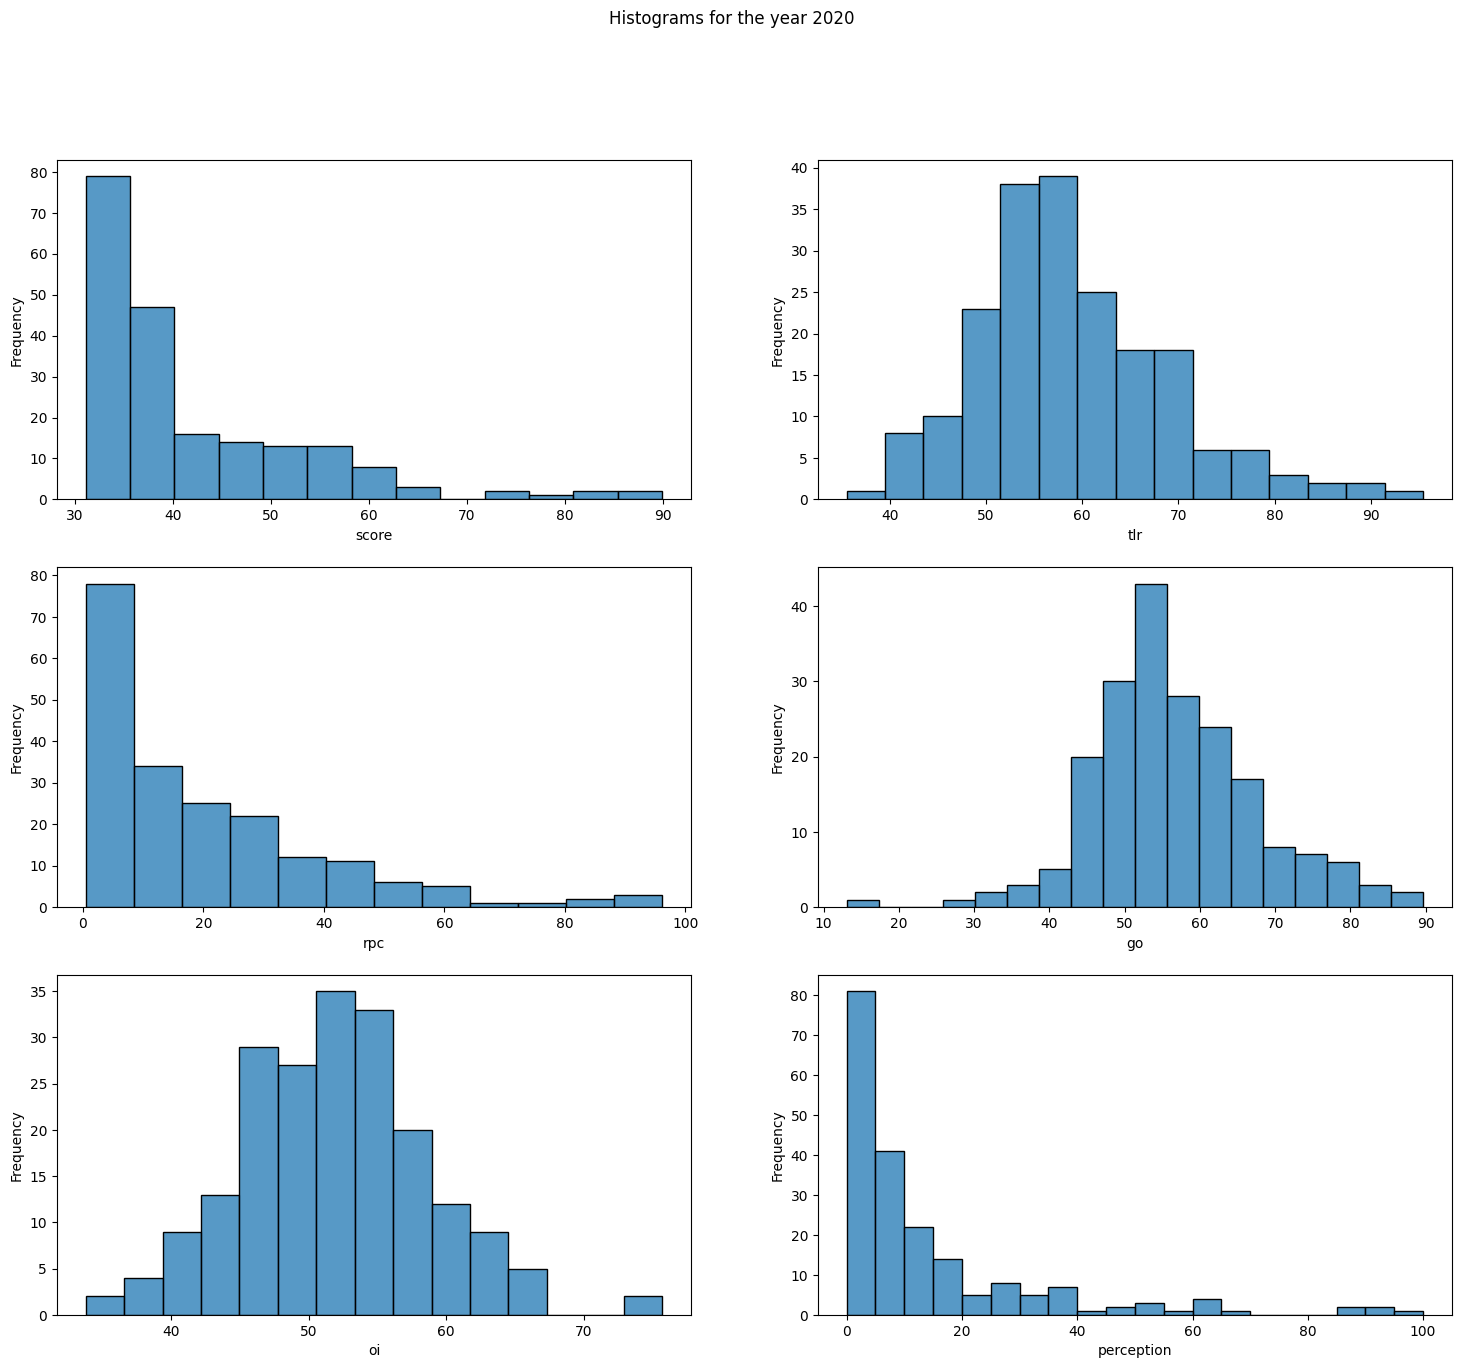

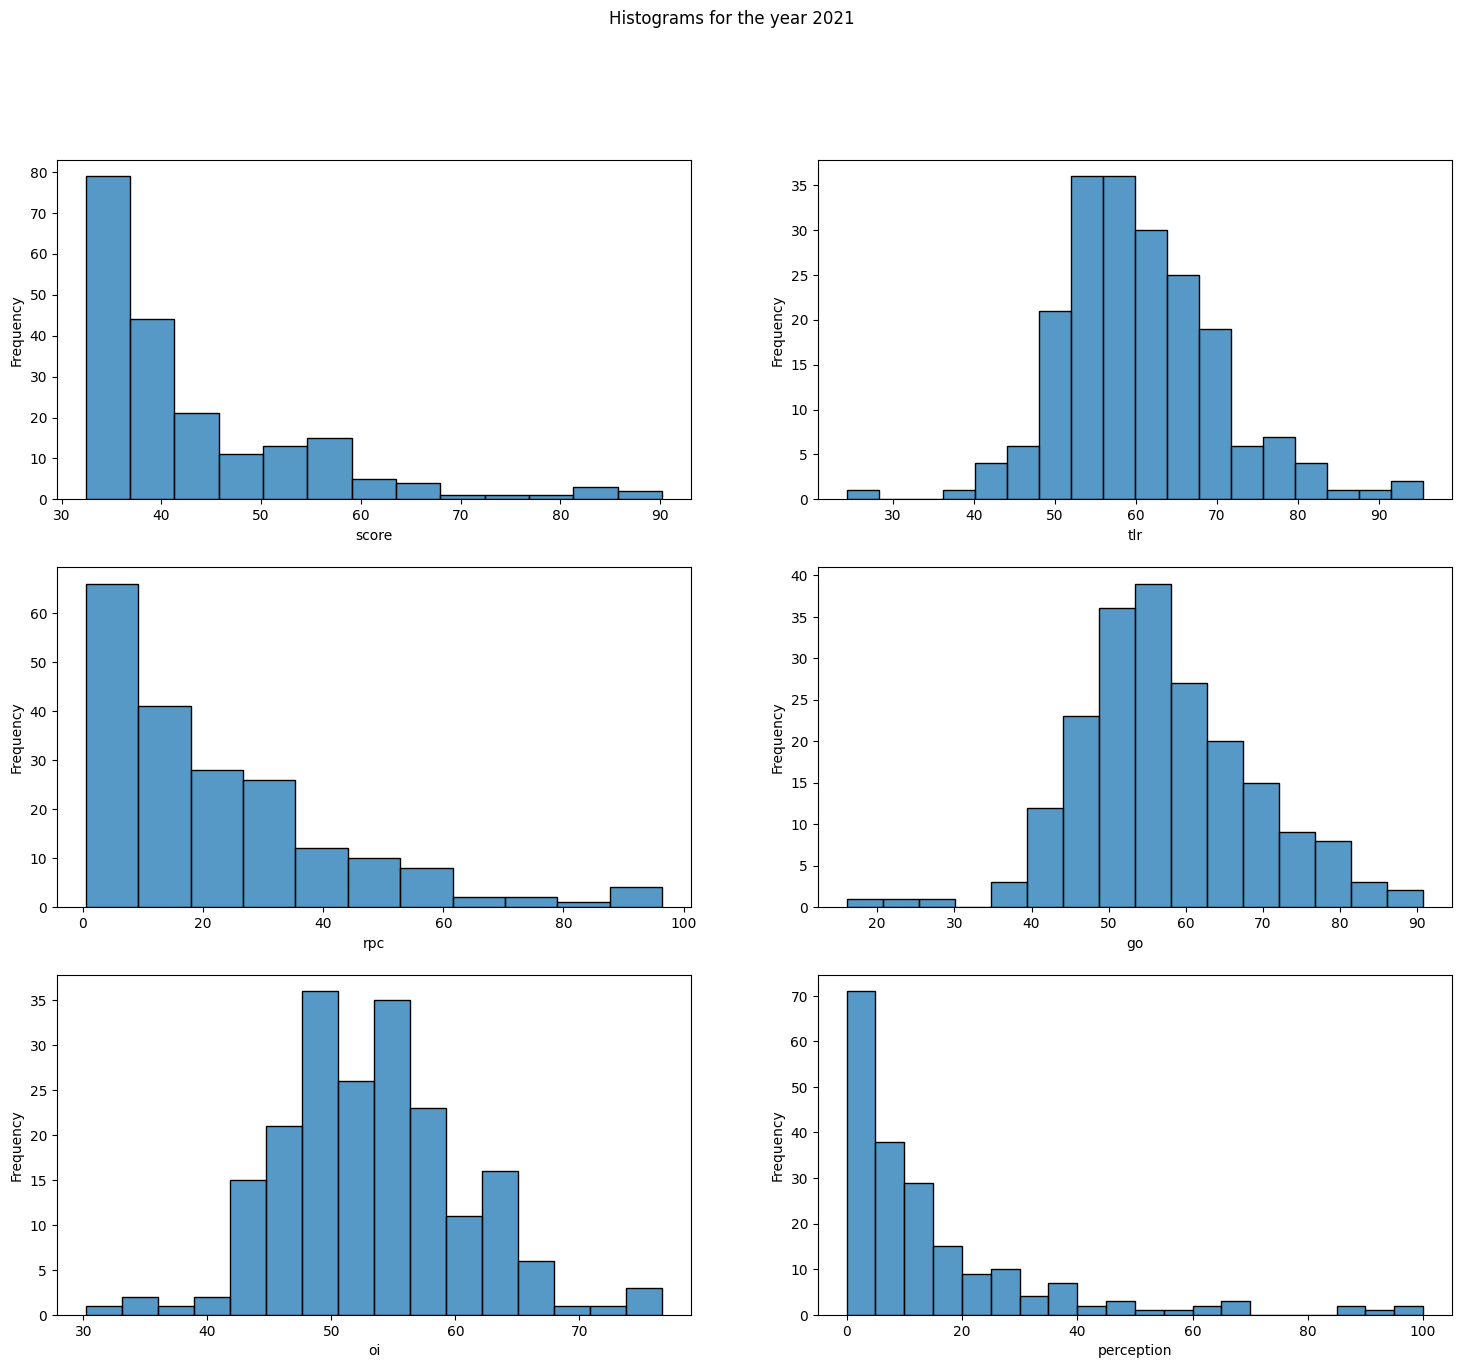

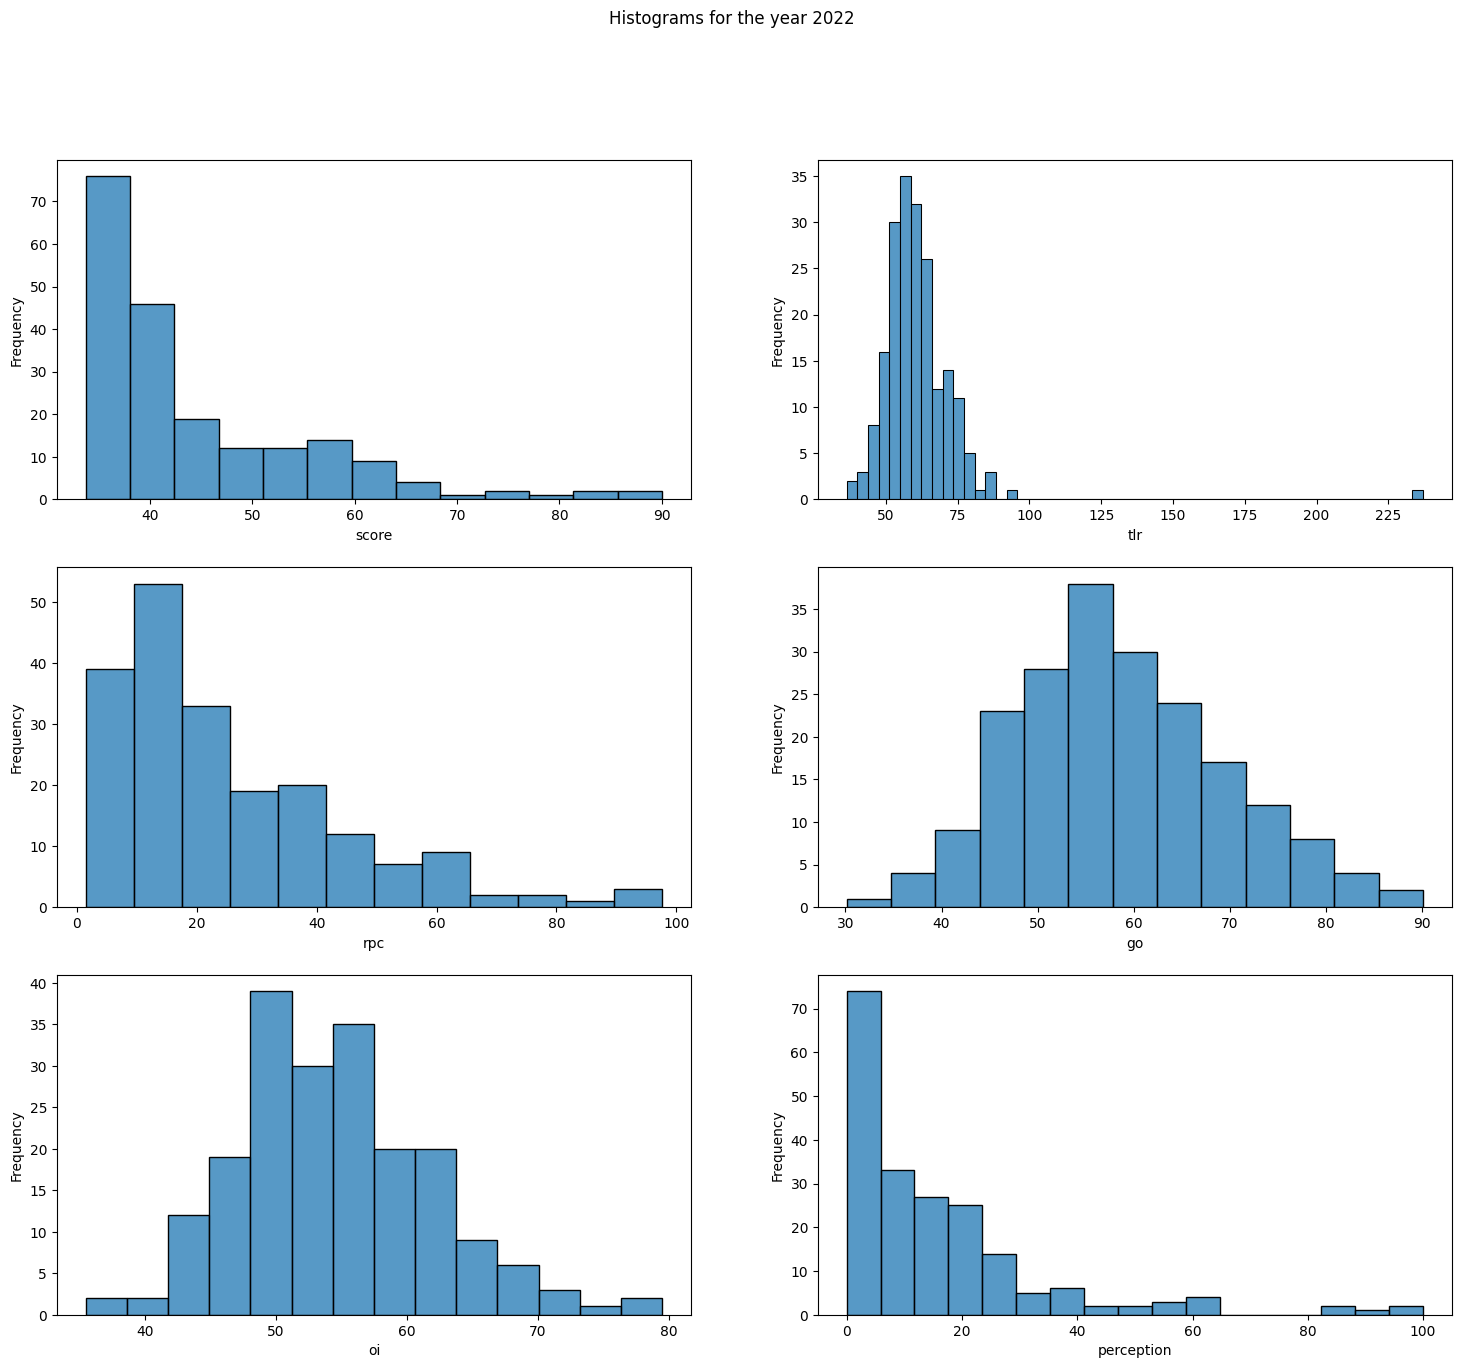

In [35]:
plt.rcParams['figure.figsize'] = [18,15]
for i,j in data.groupby('Year'):
  cols=['score','rank','tlr','rpc','go','oi','perception']
  stat_data = j[cols]
  cols =['score','tlr','rpc','go','oi','perception']
  plt.figure()
  plt.suptitle(f"Histograms for the year {i}")
  for k in range(len(cols)):
    plt.subplot(3,2,k+1)
    sns.histplot(stat_data[cols[k]], bins='auto')
    plt.xlabel(f"{cols[k]}")
    plt.ylabel(f"Frequency")
  plt.show()

ValueError: Input data must be a pandas object to reorder

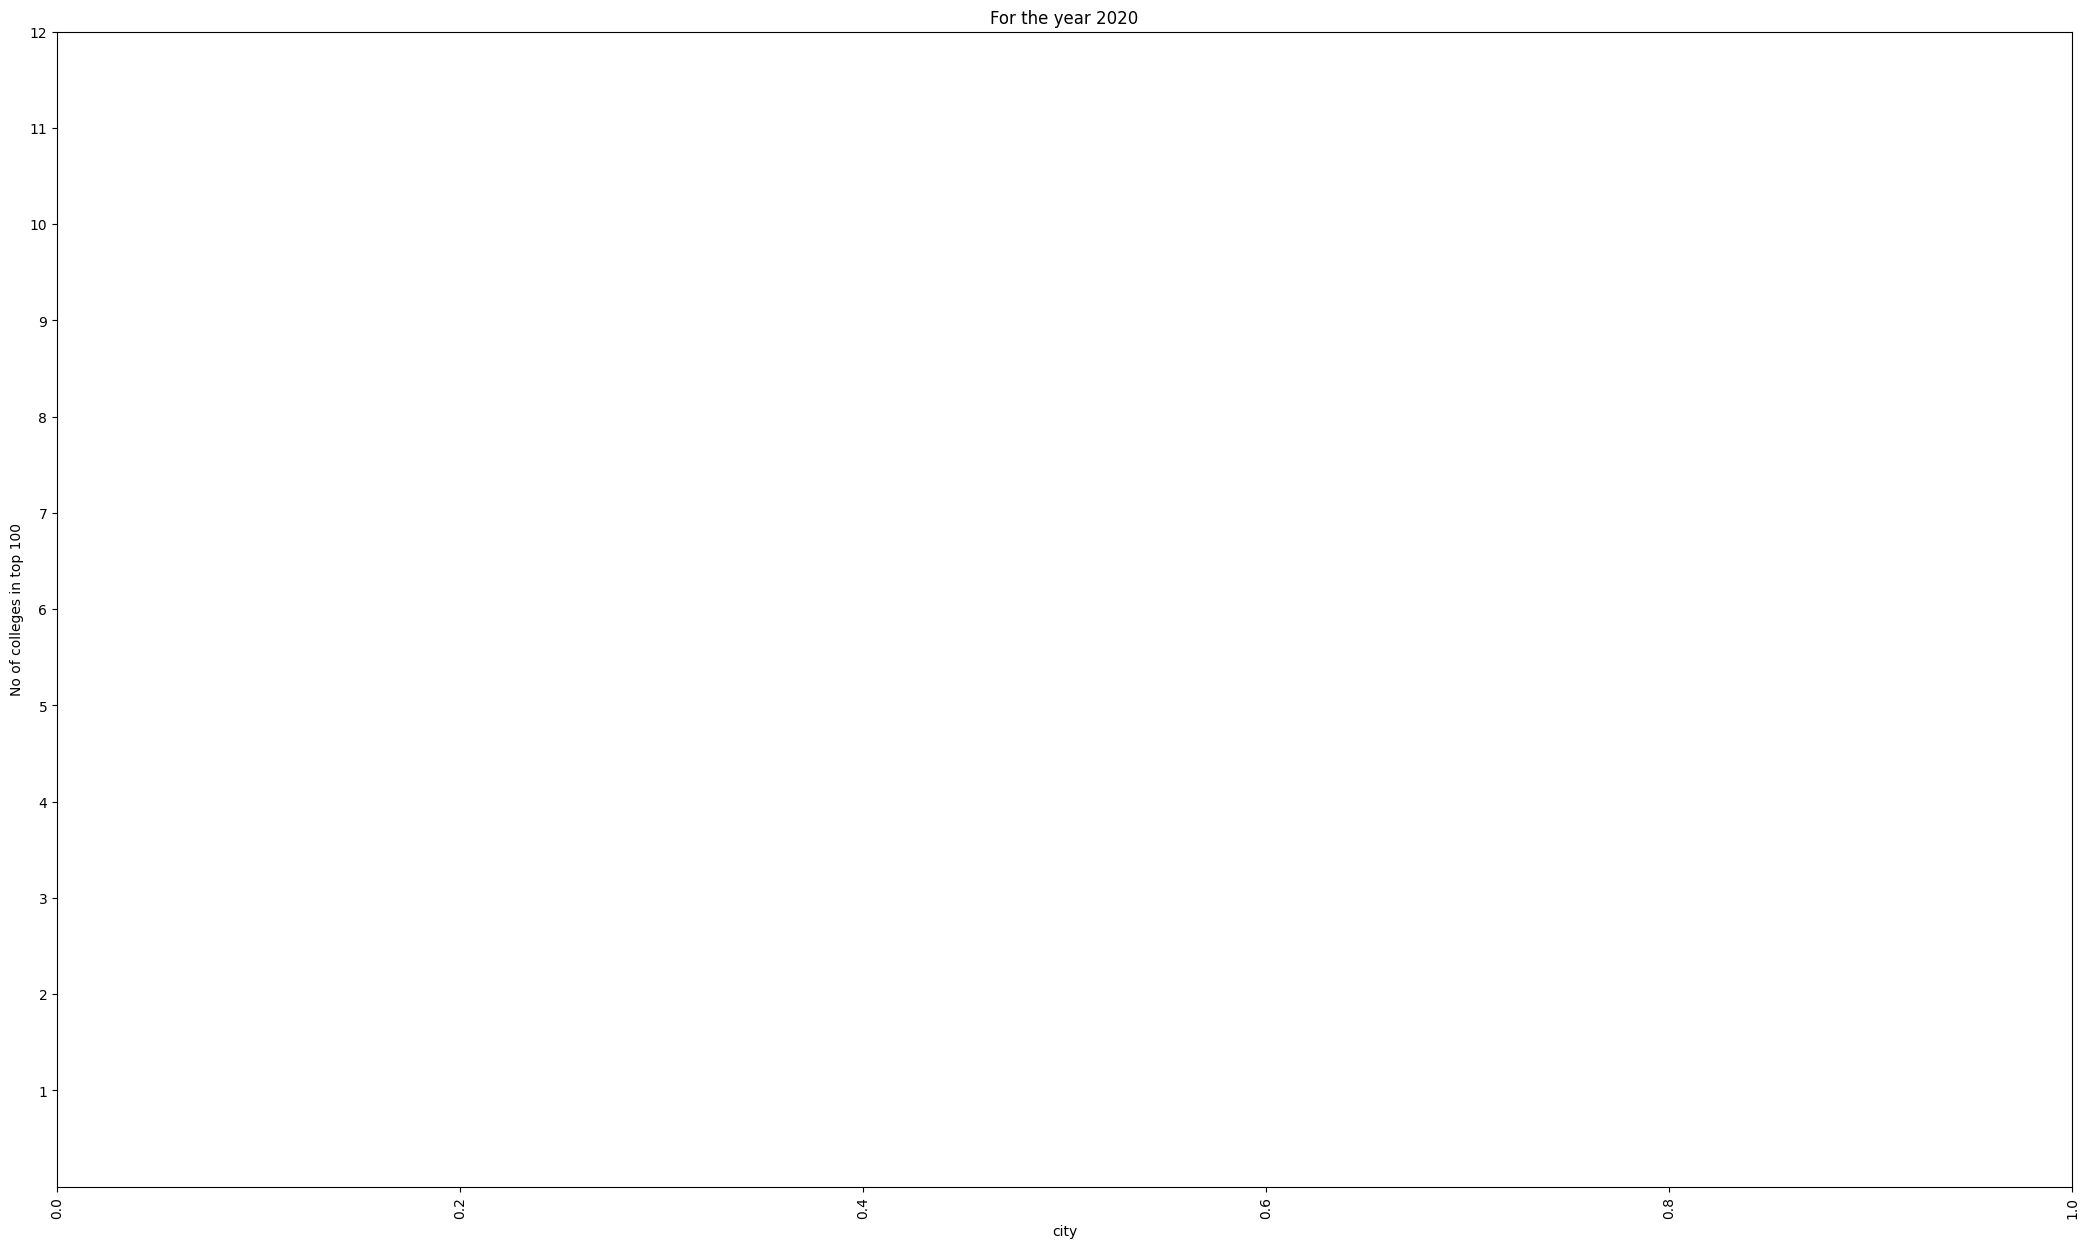

In [36]:
plt.rcParams['figure.figsize'] = [26,15]
for i,j in data.groupby('Year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,13))
    plt.xlabel("city")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['city'], order = val['city'].value_counts().index)
    plt.show()

C:\Users\vasum\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


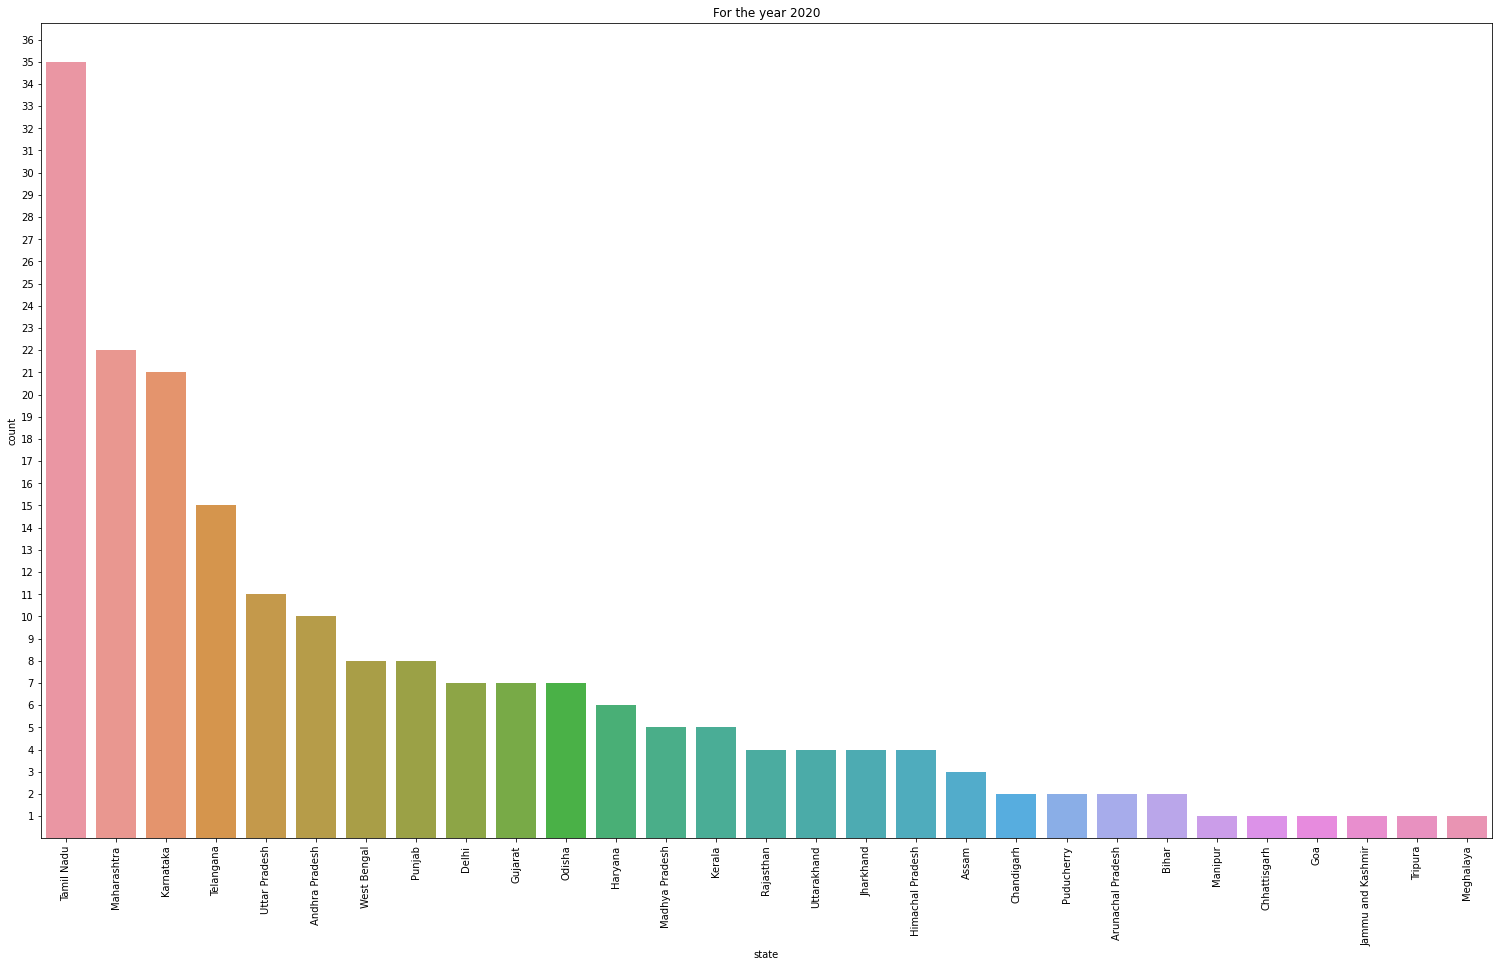

C:\Users\vasum\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


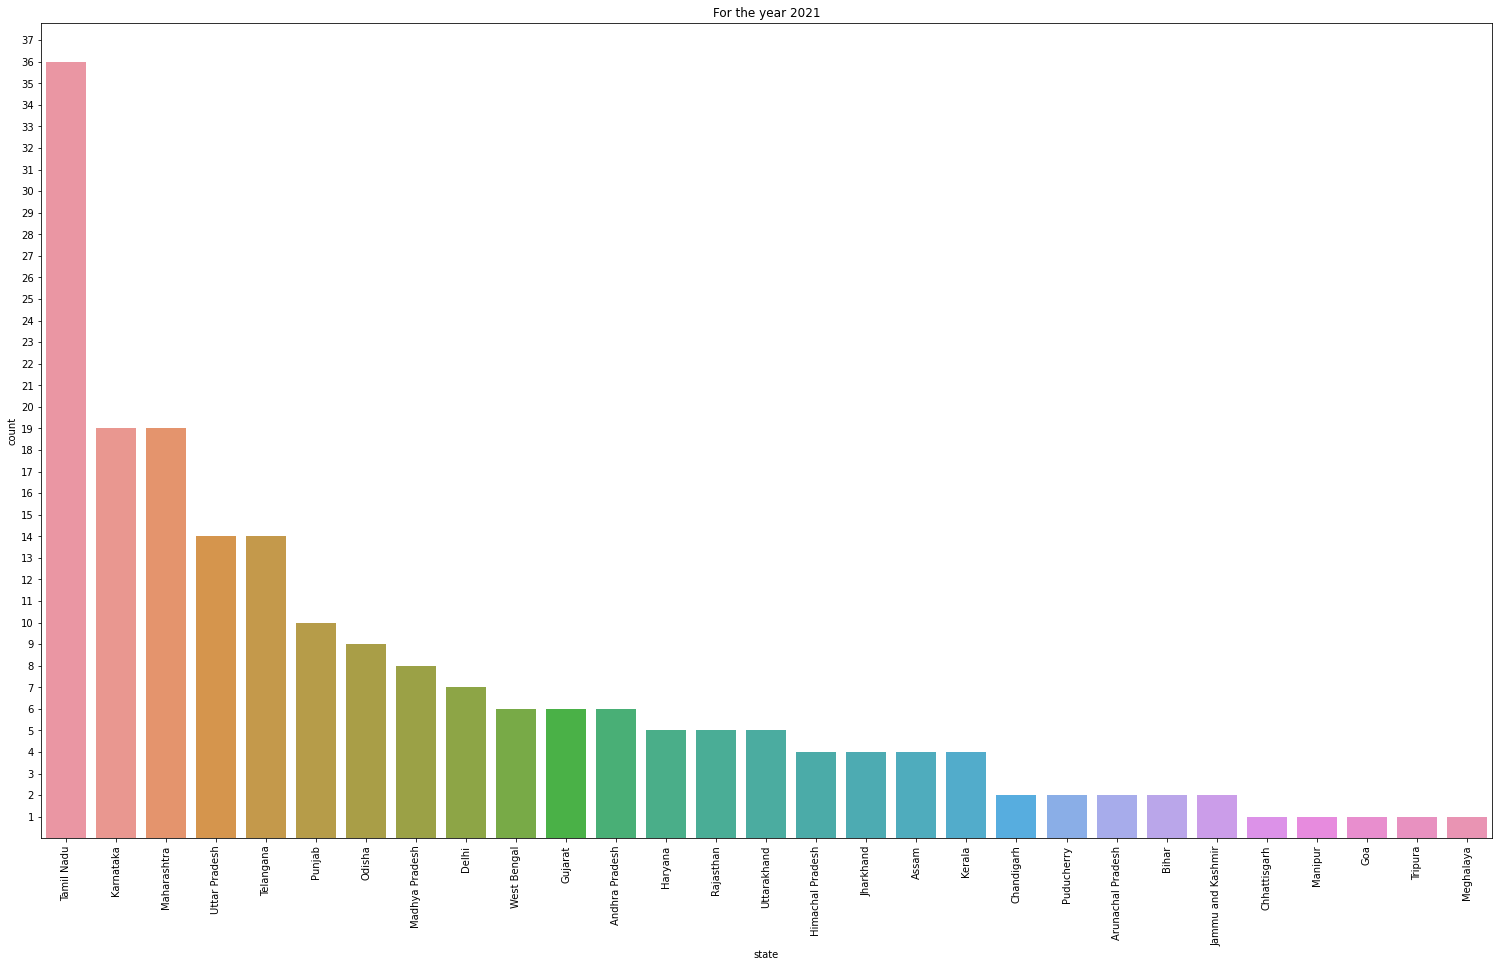

C:\Users\vasum\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


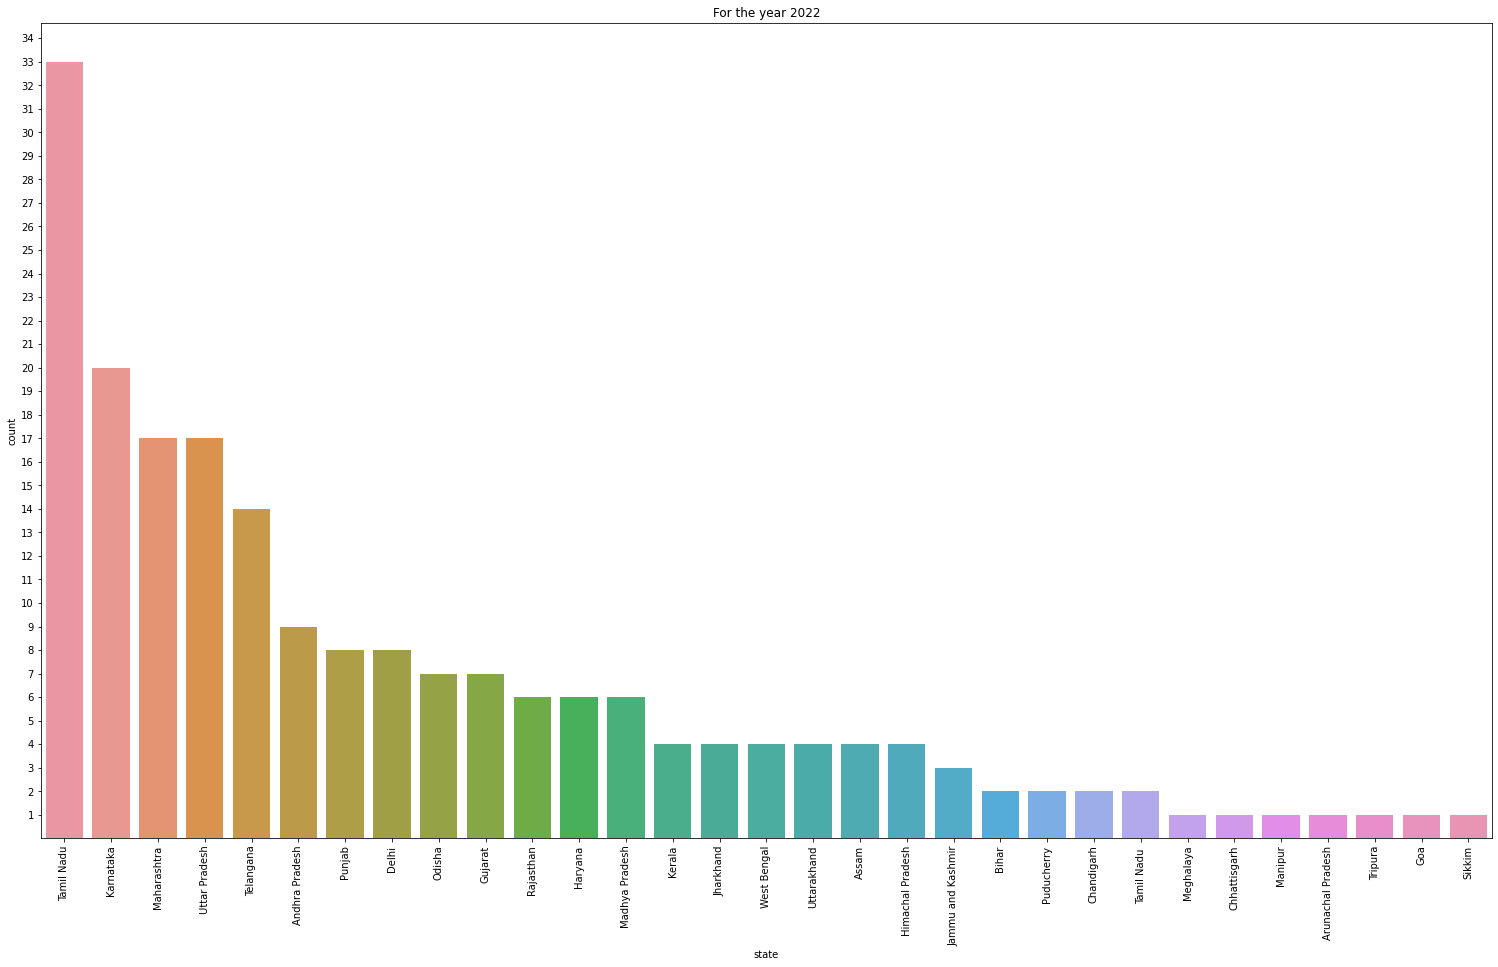

In [7]:
for i,j in data.groupby('Year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,38))
    plt.xlabel("States")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['state'], order = val['state'].value_counts().index)
    plt.show()

In [8]:
#spliting dataset into training set and testing set
#storing target variable, i.e the score separately (we have to predict score)

# from sklearn.model_selection import train_test_split

# x = data.drop(['score'],axis='columns') 
# y = data['score']

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
#combining the x and y training datasets
# train_data = x_train.join(y_train)

# #combining the x and y testing datasets
# test_data = x_test.join(y_test)

In [38]:
from sklearn.model_selection import train_test_split
train_data = data[data["Year"] < 2022].copy()
test_data = data[data["Year"] >= 2022].copy()

In [39]:
train_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year
0,IR-E-U-0456,Indian Institute of Technology Madras,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1,2020
1,IR-E-I-1074,Indian Institute of Technology Delhi,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2,2020
2,IR-E-U-0306,Indian Institute of Technology Bombay,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3,2020
3,IR-E-I-1075,Indian Institute of Technology Kanpur,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4,2020
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
395,IR-E-C-1438,The National Institute of Engineering,53.79,2.33,51.03,50.48,4.23,Mysuru,Karnataka,32.52,196,2021
396,IR-E-C-33584,K. J. Somaiya College of Engineering,52.22,3.33,58.94,38.08,2.17,Mumbai,Maharashtra,32.48,197,2021
397,IR-E-C-27400,Kakatiya Institute of Technology & Science,55.80,1.64,49.13,49.25,4.90,Warangal,Telangana,32.48,197,2021
398,IR-E-C-11015,Walchand College of Engineering,48.25,4.54,56.11,47.93,6.19,Sangli,Maharashtra,32.46,199,2021


In [12]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022


array([[<AxesSubplot:title={'center':'tlr'}>,
        <AxesSubplot:title={'center':'rpc'}>,
        <AxesSubplot:title={'center':'go'}>],
       [<AxesSubplot:title={'center':'oi'}>,
        <AxesSubplot:title={'center':'perception'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'rank'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

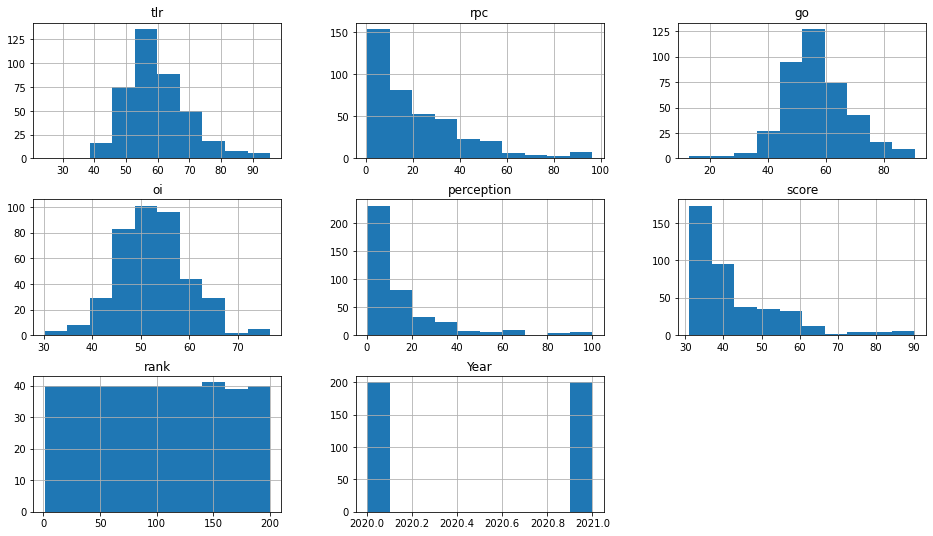

In [13]:
train_data.hist(figsize=(16,9))

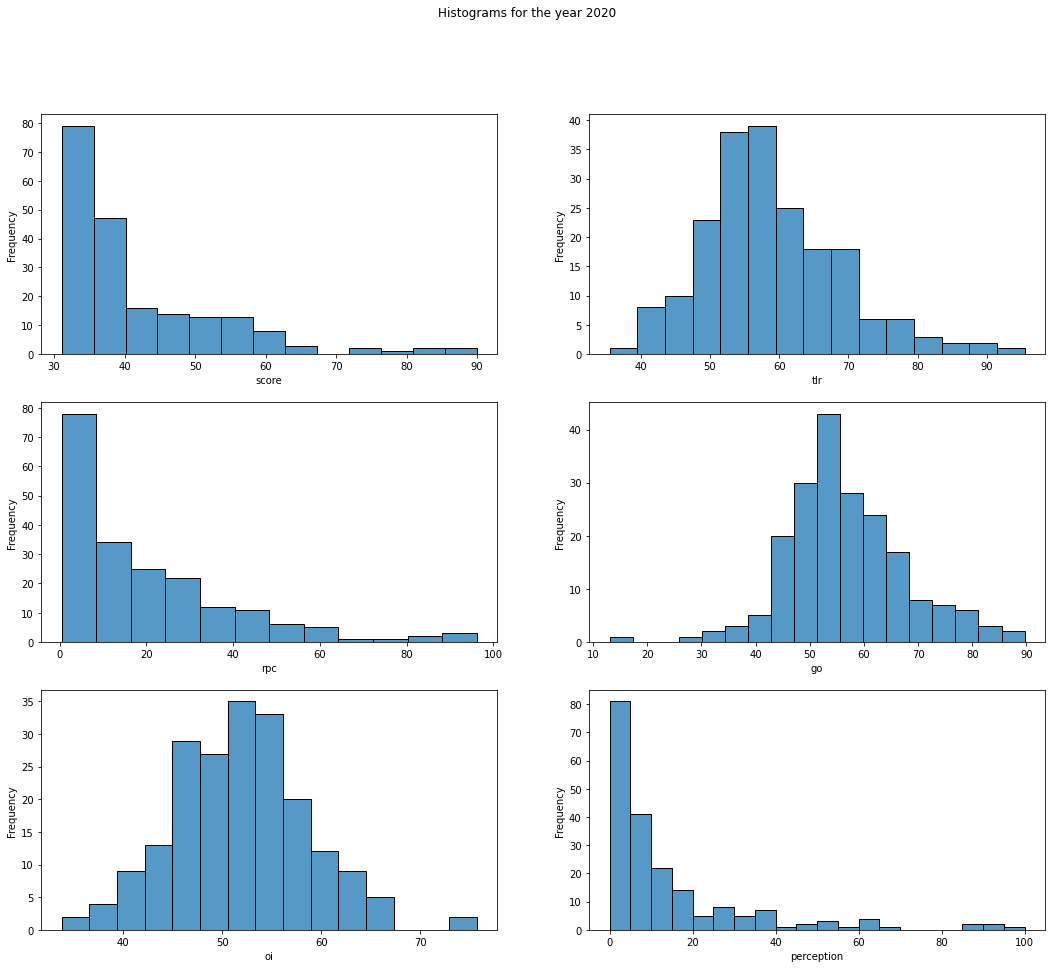

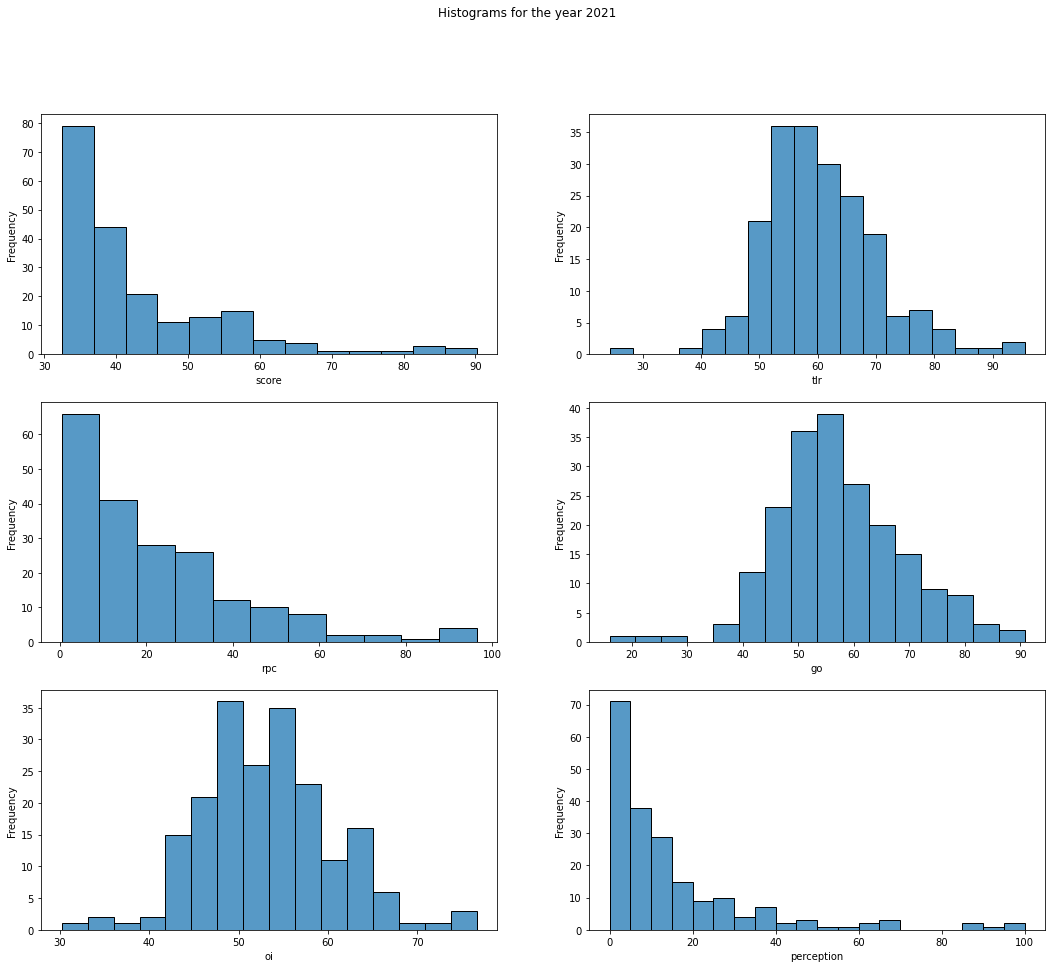

In [14]:
#yearly histogram for each parameter 

plt.rcParams['figure.figsize'] = [18,15]
for i,j in train_data.groupby('Year'):
  cols=['score','rank','tlr','rpc','go','oi','perception']
  stat_data = j[cols]
  cols =['score','tlr','rpc','go','oi','perception']
  plt.figure()
  plt.suptitle(f"Histograms for the year {i}")
  for k in range(len(cols)):
    plt.subplot(3,2,k+1)
    sns.histplot(stat_data[cols[k]], bins='auto')
    plt.xlabel(f"{cols[k]}")
    plt.ylabel(f"Frequency")
  plt.show()

<AxesSubplot:>

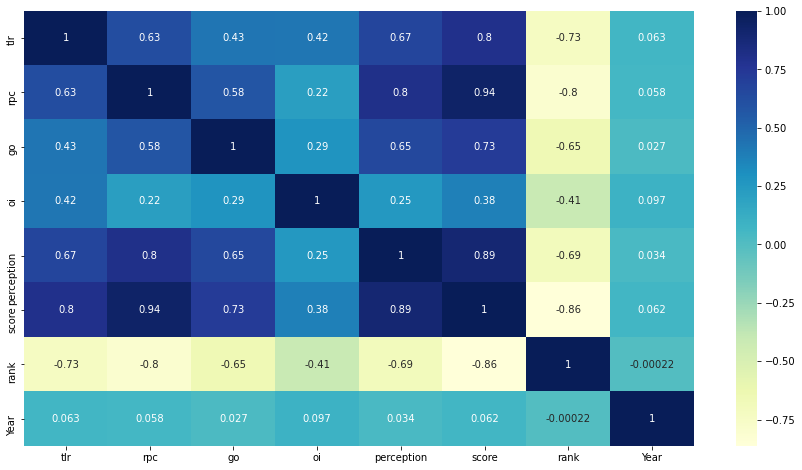

In [15]:
#checking correlation between various parameters
#for linear model we want to check for parameters to have high correlation with the value we want to predict
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

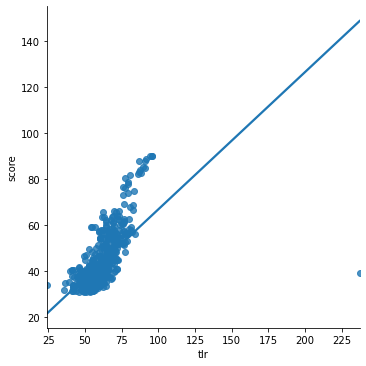

In [16]:
#relation between tlr and score is approximately linear
sns.lmplot(x="tlr", y="score", data=data, fit_reg=True, ci=None)

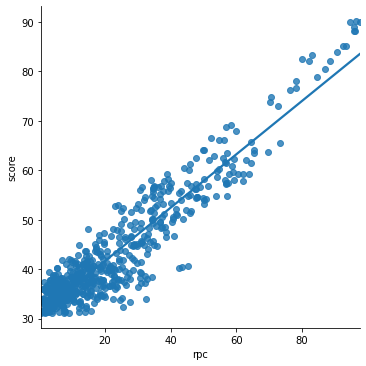

In [17]:
#relation between rpc and score looks linear, so its good
sns.lmplot(x="rpc", y="score", data=data, fit_reg=True, ci=None)

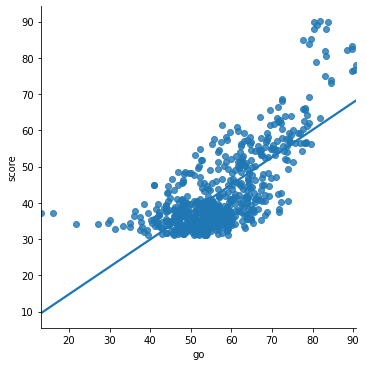

In [18]:
#relation between go and score is not looking too linear
sns.lmplot(x="go", y="score", data=data, fit_reg=True, ci=None)

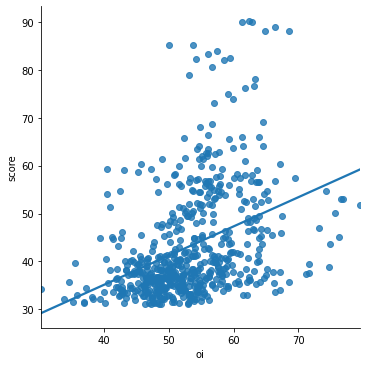

In [19]:
#relation between oi and score is not too linear
sns.lmplot(x="oi", y="score", data=data, fit_reg=True, ci=None)

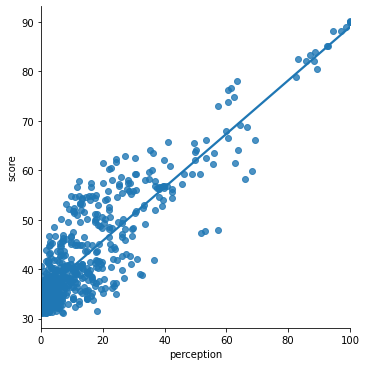

In [20]:
#relation between perception and score is linear
sns.lmplot(x="perception", y="score", data=data, fit_reg=True, ci=None)

In [40]:
#mean absolute error is our error metric
#we train our model then use this metric to check error margin

#Model Training in LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predictors = ["tlr", "rpc", "go","oi", "perception"]
target = "score"


In [41]:
reg.fit(train_data[predictors], train_data["score"])

LinearRegression()

In [42]:
predictions = reg.predict(test_data[predictors])

In [43]:
predictions

array([90.04881933, 88.11526612, 83.94923561, 82.56663719, 78.89531734,
       76.69787978, 72.96726059, 69.16815417, 68.02101389, 66.03652012,
       65.69586874, 65.52831271, 63.50236407, 63.51365795, 62.36436702,
       61.6777426 , 61.40490451, 61.38984715, 60.91439198, 60.43002365,
       59.99788137, 59.16479232, 58.26158908, 58.02232227, 57.72937472,
       57.50680571, 57.48174185, 57.17361313, 56.9031876 , 56.71062434,
       56.66374756, 56.62864657, 56.18701549, 55.76600986, 55.70800903,
       55.10442154, 54.69804618, 54.61915028, 54.62887551, 54.57013121,
       53.36655784, 53.05870871, 52.36815306, 51.93015505, 51.72396406,
       51.68719423, 51.17903903, 50.50072933, 50.20878232, 50.11466764,
       49.58186868, 48.64263032, 49.32657852, 48.55369748, 48.32306078,
       48.16071833, 47.68402486, 47.61015946, 47.00641425, 46.66697766,
       46.43951223, 46.41901441, 46.24199744, 45.86338962, 45.72074687,
       45.5103546 , 45.17089535, 44.92244486, 44.78323351, 44.43

In [44]:
test_data["predictions"] = predictions

In [45]:
test_data["predictions"] = test_data["predictions"].round(2)

In [46]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76


In [170]:
#calculating mean error, i.e on average how far away we were from actual score
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test_data["score"], test_data["predictions"])

In [171]:
error

0.30734999999999996

In [49]:
#mean error should be less than std(standard deviation)
data.describe()["score"]

count    600.000000
mean      43.176733
std       11.545820
min       31.090000
25%       35.262500
50%       38.710000
75%       48.415000
max       90.190000
Name: score, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [115]:
model = RandomForestRegressor(random_state=135)
predictors = ["tlr", "rpc", "go","oi", "perception"]
target = "score"

In [116]:
model.fit(train_data[predictors], train_data["score"])

RandomForestRegressor(random_state=135)

In [84]:
prediction = model.predict(test_data[predictors])

In [102]:
prediction

array([89.1765, 87.1273, 81.2014, 82.171 , 82.2381, 76.7925, 74.7609,
       65.557 , 65.1754, 64.0239, 62.1688, 72.6493, 64.3568, 62.1781,
       59.1165, 58.4311, 60.5193, 56.3104, 60.2869, 55.6053, 58.6142,
       56.2825, 57.2865, 56.7967, 54.9277, 54.9677, 54.2928, 56.8982,
       57.3448, 54.4981, 56.4344, 55.2598, 57.693 , 54.7823, 56.3862,
       55.1723, 54.4417, 54.3368, 52.2416, 57.3208, 52.7774, 52.0343,
       52.0364, 52.6822, 49.0551, 53.2477, 49.931 , 50.4675, 49.9249,
       51.3316, 50.0377, 46.509 , 51.4463, 49.3348, 47.972 , 43.897 ,
       46.8662, 48.923 , 44.9967, 45.5919, 47.5151, 47.1958, 45.3363,
       44.5398, 48.5058, 44.2003, 46.4667, 43.1208, 45.9332, 44.2371,
       47.6517, 43.1225, 42.8729, 40.3543, 41.7821, 44.7273, 40.8758,
       41.7669, 41.6037, 40.1347, 41.4822, 41.6192, 42.1378, 39.4334,
       40.7159, 41.3017, 40.8901, 39.4407, 39.623 , 40.7798, 42.29  ,
       43.7177, 40.6154, 40.2077, 41.4888, 41.5412, 39.4582, 39.3962,
       39.0394, 40.9

In [135]:
test_data["random_pred"] = prediction

In [136]:
test_data["random_pred"] = test_data["random_pred"].round(2)

In [139]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions,l_pred,random_pred
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05,89.81,89.18
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12,87.82,87.13
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95,83.81,81.20
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57,82.30,82.17
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90,78.85,82.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90,34.03,34.12
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89,34.02,34.11
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77,33.68,33.99
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76,33.83,33.31


In [141]:
err = mean_absolute_error(test_data["score"], test_data["random_pred"])

In [109]:
error

1.1477

In [110]:
data.describe()["score"]

count    600.000000
mean      43.176733
std       11.545820
min       31.090000
25%       35.262500
50%       38.710000
75%       48.415000
max       90.190000
Name: score, dtype: float64

In [145]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [146]:
lasso.fit(train_data[predictors], train_data["score"])

Lasso()

In [119]:
pred3 = lasso.predict(test_data[predictors])

In [147]:
pred3

array([89.81031835, 87.81718118, 83.81025523, 82.29698763, 78.84512197,
       76.38665372, 72.76817015, 68.90599524, 67.90431838, 65.7807233 ,
       65.5825663 , 65.47026113, 63.41924053, 63.42228072, 62.15134215,
       61.51943272, 61.60490978, 61.19032531, 60.79264115, 59.99645344,
       59.81949127, 58.82787386, 58.02045921, 57.8557244 , 57.6082166 ,
       57.2976082 , 57.06055435, 57.10525074, 56.81446322, 56.24827624,
       56.39849214, 56.4647695 , 56.13941665, 55.55982642, 55.57322696,
       54.8758701 , 54.79077075, 54.45103106, 54.19168113, 54.65338171,
       53.17482083, 52.63177144, 52.13640691, 51.83738128, 51.2929194 ,
       51.59316256, 51.0877665 , 50.46026341, 50.13647524, 50.05862815,
       49.37157851, 48.39412432, 49.35370991, 48.45834957, 48.19421512,
       47.98264426, 47.87050776, 47.61406604, 46.54766518, 46.42731785,
       46.35676605, 46.50525249, 46.29962763, 45.66252634, 45.64398743,
       45.22526102, 45.0513354 , 44.65220864, 44.91527878, 44.31

In [148]:
test_data["lasso_pred"] = pred3

In [149]:
test_data["lasso_pred"] = test_data["lasso_pred"].round(2)

In [151]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions,l_pred,random_pred,lasso_pred
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05,89.81,89.18,89.81
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12,87.82,87.13,87.82
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95,83.81,81.20,83.81
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57,82.30,82.17,82.30
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90,78.85,82.24,78.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90,34.03,34.12,34.03
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89,34.02,34.11,34.02
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77,33.68,33.99,33.68
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76,33.83,33.31,33.83


In [152]:
del test_data["l_pred"]

In [153]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions,random_pred,lasso_pred
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05,89.18,89.81
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12,87.13,87.82
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95,81.20,83.81
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57,82.17,82.30
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90,82.24,78.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90,34.12,34.03
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89,34.11,34.02
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77,33.99,33.68
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76,33.31,33.83


In [154]:
err1 = mean_absolute_error(test_data["score"], test_data["lasso_pred"])

In [155]:
err1

0.42135000000000006

In [158]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)

In [159]:
ridge.fit(train_data[predictors], train_data["score"])

Ridge()

In [160]:
pred4= ridge.predict(test_data[predictors])

In [161]:
pred4

array([90.04874357, 88.11525207, 83.94917874, 82.56649912, 78.89531466,
       76.69773665, 72.96712275, 69.168125  , 68.02093235, 66.03646591,
       65.69571788, 65.52836618, 63.50241928, 63.51354423, 62.36412438,
       61.67747385, 61.40509978, 61.38955116, 60.91438731, 60.42974562,
       59.99771602, 59.16456419, 58.26142013, 58.02224454, 57.72917122,
       57.50666711, 57.4815017 , 57.17354756, 56.90316768, 56.71027211,
       56.66370177, 56.62842285, 56.18688826, 55.76584104, 55.7079791 ,
       55.10430697, 54.69785468, 54.61898143, 54.62873711, 54.5701804 ,
       53.36633103, 53.05859784, 52.36806083, 51.93000238, 51.7239261 ,
       51.68705761, 51.17893967, 50.50066819, 50.20856766, 50.11461858,
       49.58183253, 48.64249858, 49.32655285, 48.55372313, 48.32303187,
       48.16059017, 47.68423482, 47.61008798, 47.00624825, 46.66681703,
       46.43957048, 46.41911801, 46.24184844, 45.8634109 , 45.72069643,
       45.5102629 , 45.17079777, 44.92233464, 44.78322378, 44.43

In [163]:
test_data["ridge_pred"] = pred4
test_data["ridge_pred"]=test_data["ridge_pred"].round(2)

In [164]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions,random_pred,lasso_pred,ridge_pred
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05,89.18,89.81,90.05
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12,87.13,87.82,88.12
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95,81.20,83.81,83.95
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57,82.17,82.30,82.57
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90,82.24,78.85,78.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90,34.12,34.03,33.90
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89,34.11,34.02,33.89
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77,33.99,33.68,33.77
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76,33.31,33.83,33.76


In [165]:
err2 = mean_absolute_error(test_data["score"], test_data["ridge_pred"])

In [166]:
err2

0.30724999999999997

In [207]:
from sklearn.tree import DecisionTreeRegressor
reg1=DecisionTreeRegressor(criterion="absolute_error",max_depth=10,min_samples_split=10,random_state=5)

In [208]:
reg1.fit(train_data[predictors], train_data["score"])

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=10, random_state=5)

In [209]:
pred5= reg1.predict(test_data[predictors])


In [210]:
pred5

array([89.445, 89.445, 82.7  , 82.7  , 82.7  , 75.595, 75.595, 66.26 ,
       66.26 , 62.72 , 62.72 , 75.595, 59.305, 59.305, 60.31 , 60.31 ,
       59.305, 53.52 , 62.72 , 60.31 , 57.925, 55.595, 57.925, 60.31 ,
       53.52 , 54.58 , 52.25 , 57.695, 54.39 , 52.25 , 56.62 , 54.58 ,
       62.72 , 60.31 , 56.62 , 55.595, 53.52 , 54.58 , 53.065, 59.305,
       52.25 , 52.25 , 53.065, 53.52 , 48.59 , 54.58 , 49.78 , 49.78 ,
       52.25 , 54.58 , 52.25 , 46.45 , 55.595, 52.25 , 48.59 , 41.875,
       48.59 , 49.78 , 43.71 , 46.45 , 48.59 , 40.16 , 45.59 , 43.71 ,
       49.78 , 43.11 , 43.71 , 41.875, 40.16 , 45.59 , 49.78 , 43.11 ,
       41.58 , 37.42 , 37.78 , 44.97 , 41.065, 43.11 , 41.58 , 39.87 ,
       43.11 , 40.23 , 43.11 , 37.78 , 40.25 , 41.875, 40.25 , 37.42 ,
       39.87 , 41.58 , 41.875, 40.16 , 40.25 , 38.2  , 41.875, 41.875,
       38.97 , 38.83 , 37.78 , 43.11 , 36.675, 38.2  , 36.675, 38.97 ,
       38.83 , 39.87 , 36.53 , 39.87 , 38.97 , 38.97 , 36.675, 41.875,
      

In [211]:
test_data["Decision_pred"] = pred5
test_data["Decision_pred"]=test_data["Decision_pred"].round(2)

In [212]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year,predictions,random_pred,lasso_pred,ridge_pred,Decision_pred
400,IR-E-U-0456,Indian Institute of Technology Madras,94.61,97.66,80.42,62.85,100.00,Chennai,Tamil Nadu,90.04,1,2022,90.05,89.18,89.81,90.05,89.44
401,IR-E-I-1074,"Indian Institute of Technology, Delhi",86.94,96.01,83.42,68.56,96.92,New Delhi,Delhi,88.12,2,2022,88.12,87.13,87.82,88.12,89.44
402,IR-E-U-0306,"Indian Institute of Technology, Bombay",87.53,90.82,79.19,57.37,88.70,Mumbai,Maharashtra,83.96,3,2022,83.95,81.20,83.81,83.95,82.70
403,IR-E-I-1075,Indian Institute of Technology Kanpur,87.95,79.98,89.70,59.47,83.01,Kanpur,Uttar Pradesh,82.56,4,2022,82.57,82.17,82.30,82.57,82.70
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,78.89,5,2022,78.90,82.24,78.85,78.90,82.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022,33.90,34.12,34.03,33.90,33.55
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022,33.89,34.11,34.02,33.89,35.28
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022,33.77,33.99,33.68,33.77,32.42
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022,33.76,33.31,33.83,33.76,32.42


In [213]:
err3 = mean_absolute_error(test_data["score"], test_data["Decision_pred"])

In [214]:
err3

1.9798000000000002

In [216]:
import pandas as pd
result=pd.DataFrame({"Frame_Work":["Linear Regression","Random Forest","lasso regression","ridge regression","Decisiontree regression"],
                     "Mean_abs_error":[error,err,err1,err2,err3]})
print(result)

                Frame_Work  Mean_abs_error
0        Linear Regression         0.30735
1            Random Forest         1.14770
2         lasso regression         0.42135
3         ridge regression         0.30725
4  Decisiontree regression         1.97980
